In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,f1_score
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\rohan\\OneDrive\\Desktop\\Datasets\\Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
print(df.shape)

(215, 15)


In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
print(df.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [7]:
print(df['status'].value_counts())

Placed        148
Not Placed     67
Name: status, dtype: int64


The missing values of salary are for the records with the placement status as 'Not placed'

In [8]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

Text(0, 0.5, 'Number of students')

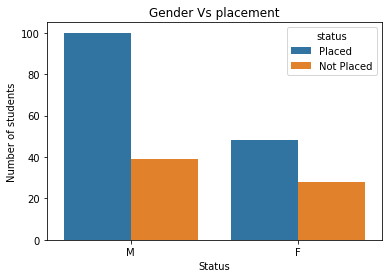

In [9]:
sns.countplot(x = 'gender', hue = 'status', data = df)
plt.title('Gender Vs placement')
plt.xlabel('Status')
plt.ylabel('Number of students')

Text(0, 0.5, 'Number of students')

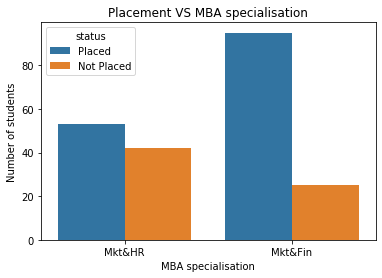

In [10]:
# MBA specialization Vs Placement 
sns.countplot(x= 'specialisation', data = df, hue = 'status')
plt.title('Placement VS MBA specialisation')
plt.xlabel('MBA specialisation')
plt.ylabel('Number of students')

Text(0, 0.5, 'Number of students')

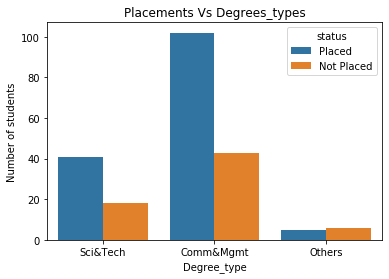

In [11]:
# correlation of degree type and placements

sns.countplot(x= 'degree_t', data = df, hue = 'status')
plt.title('Placements Vs Degrees_types')
plt.xlabel('Degree_type')
plt.ylabel('Number of students')

Text(0, 0.5, 'Number of students')

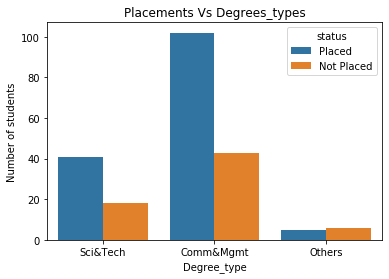

In [12]:
# correlation of degree type and placements
sns.countplot(x= 'degree_t', data = df, hue = 'status')
plt.title('Placements Vs Degrees_types')
plt.xlabel('Degree_type')
plt.ylabel('Number of students')

Text(0, 0.5, 'Number of students')

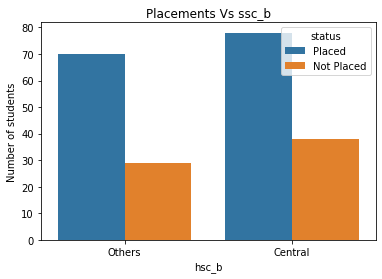

In [13]:
# correlation of degree type and placements
sns.countplot(x= 'ssc_b', data = df, hue = 'status')
plt.title('Placements Vs ssc_b')
plt.xlabel('hsc_b')
plt.ylabel('Number of students')

In [14]:
# Mapping status column to 1 and 0
df['status_1'] = df['status'].map({'Placed':1,'Not Placed':0})

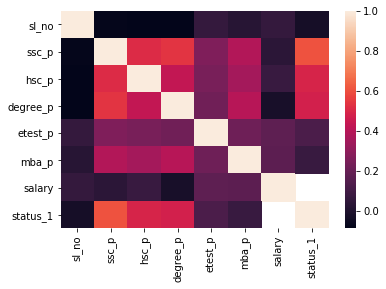

In [15]:
corr = df.corr()
sns.heatmap(corr)

From the heatmap we can see that the features Degree_p,hsc_p,ssc_p are highly correlated with status whereas etest_p and mba_p are less correlated with the status

In [16]:
X = df.drop(['status','salary','status_1','sl_no'],axis = 1)
y = df['status_1']

In [17]:
# Seperating categorical and numetical variable list
cat_col = X.select_dtypes(include= ['object']).columns
num_col = X.select_dtypes(exclude= ['object']).columns        

In [18]:
# Encoding categorical variables
Encoder = LabelEncoder()
scaler = MinMaxScaler()

for col in cat_col:
    X[col] = Encoder.fit_transform(X[col])
        
# Scaling numerical data
X[num_col] = scaler.fit_transform(X[num_col])


In [19]:
X.shape

(215, 12)

In [20]:
# Lets fit a model to predict status of the placement.

#X = X[['ssc_p','hsc_p','degree_p','workex','specialisation']]
train_X,test_X, train_y, test_y = train_test_split(X,y,test_size = 0.20, random_state = 0)

from above analysis we can see that ssc_p, hsc_p,degree_p, workex and specialization are top 5 features

In [21]:
# Predicting status using Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


classifiers = [LogisticRegression(), 
               KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2),
               SVC(kernel = 'linear'), 
               SVC(kernel = 'rbf'),
               DecisionTreeClassifier(criterion='entropy'), 
               RandomForestClassifier(n_estimators = 20, criterion = 'entropy')]


for clf in classifiers:
    clf.fit(train_X,train_y)
    y_pred = clf.predict(test_X)
    
    #Classifier
    
    print(str(type(clf)).split('.')[-1][:-2])
    
    # Accuracy
    
    print('Model accuracy is:',accuracy_score(test_y,y_pred))
    
    # F1 score
    
    print('Model F1-Score is:',f1_score(test_y,y_pred),'\n')
    

LogisticRegression
Model accuracy is: 0.813953488372093
Model F1-Score is: 0.8666666666666665 

KNeighborsClassifier
Model accuracy is: 0.627906976744186
Model F1-Score is: 0.75 

SVC
Model accuracy is: 0.813953488372093
Model F1-Score is: 0.8571428571428572 

SVC
Model accuracy is: 0.6976744186046512
Model F1-Score is: 0.7936507936507936 

DecisionTreeClassifier
Model accuracy is: 0.6976744186046512
Model F1-Score is: 0.7636363636363638 

RandomForestClassifier
Model accuracy is: 0.6976744186046512
Model F1-Score is: 0.7719298245614035 



Highest accuracy is 0.813953488372093 
 when k is: 11


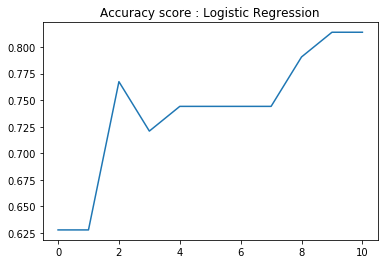

In [23]:
# Feature selection 

accuracy = []
p_values = []

for k in range(1,12):
    # selecting features
    selector = SelectKBest(score_func= chi2, k = k)
    X_new = selector.fit_transform(X,y)
    

    #Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)
     
    #classifier 
    
    clf = LogisticRegression(random_state= 0)
    clf.fit(X_train,y_train)
    y_predicted = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_predicted))
    
    
    
plt.figure()
plt.plot(accuracy)
plt.title('Accuracy score : Logistic Regression')
print('Highest accuracy is',max(accuracy),'\n','when k is:',k)



  # Data Analysis for salary distribution

In [ ]:
# salary analysis
df_salaried = df[df.status == 'Placed']

In [ ]:
sns.kdeplot(df_salaried.salary)

In [ ]:
# salary distribution for male and female

plt.hist(df_salaried[df_salaried['gender'] == 'M']['salary'])
plt.hist(df_salaried[df_salaried['gender'] == 'F']['salary'])
plt.xlabel('Salaries offered')
plt.ylabel('Number of Students')
plt.title('Histogram of salary offered to male Vs female')
plt.legend(['male','female'])

In [ ]:
plt.hist(df_salaried[df_salaried['workex'] == 'Yes']['salary'])
plt.hist(df_salaried[df_salaried['workex'] == 'No']['salary'])
plt.xlabel('Salaries offered')
plt.ylabel('Number of Students')
plt.title('Histogram of salary offered to experienced and non experienced students')
plt.legend(df_salaried['workex'])

In [ ]:
sns.boxplot(x='workex',y='salary',data=df_salaried)

Workex can add up to higher packages. 

In [ ]:
plt.scatter(x = df_salaried['degree_p'], y =df_salaried['salary'])
#plt.scatter(x = df_salaried['hsc_p'], y =df_salaried['salary'])
#plt.scatter(x = df_salaried['ssc_p'], y =df_salaried['salary'])
plt.xlabel('Degree percentage')
plt.ylabel('salary offered')
plt.title('Salaries offered Vs Degree_percentage')

From above scatter plot we can see that:
1.majority students who have been placed have got salaries in the range of 200K to 450K.
2.students with the degree percentage 65 to 80 have got good salary packages.
3.There seems to be an outlier in the dataset with the academic percentage above 90 but landed with a job with salary 250K

In [ ]:
sns.boxplot(x='hsc_s',y='salary',data=df_salaried,hue='gender')

In [ ]:
# Removing outilers 
sns.boxplot(df_salaried.salary)

from scipy import stats
z = np.abs(stats.zscore(df_salaried['salary']))
df_salaried['zscore'] = z


In [ ]:
# removal of outliers 
df_salaried_OF = df_salaried[df_salaried['zscore'] < 3]
sns.boxplot(df_salaried_OF.salary)

In [ ]:
# Feature engineering to apply linear regression 

for col in cat_col:
    df_salaried_OF[col] = Encoder.fit_transform(df_salaried_OF[col])
    
    
df_salaried_OF[num_col] = scaler.fit_transform(df_salaried_OF[num_col])

df_salaried = df_salaried_OF.drop(['sl_no','zscore','status','status_1'],axis = 1)

In [ ]:
df_salaried.head()
features_list = df_salaried.columns
features_list = features_list[:-1]
features_list

In [ ]:
from sklearn.linear_model import LinearRegression
X_lin= df_salaried[features_list]
y_lin= df_salaried['salary']

train_x,test_x,train_Y,test_Y = train_test_split(X_lin,y_lin, test_size = 0.20, random_state = 42)
reg = LinearRegression()
reg.fit(train_x,train_Y)
#print('Coefficient for the independent variables are:','\n',reg.coef_)
#print('\n','Intercept of linear equation is :',reg.intercept_)

y_predict = reg.predict(test_x)
print('R2_score',round(r2_score(y_predict,test_Y),2))
print('Mean absolute error is:',round(mean_absolute_error(y_predict,test_Y),2))



In [ ]:
import statsmodels.api as sm
X = df_salaried[features_list]
y = df_salaried['salary']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

 mba_p,degree_t and ssc_p,gender are significant independent variables to predict salary